# COIS3510 – Assignment 2  
## Exploratory Data Analysis Using Multivariate Visualization Techniques

**Name:** Dikshith Reddy Macherla
**Student ID:** 0789055
**Course:** COIS-3510 Data Visualization
**Date:** 2025-11-09  

---

### Objective

In this assignment, I explore an open, publicly available dataset using **multivariate data visualization techniques** discussed in class.  
The goal is to:

- Use at least **5 variables** from the dataset.
- Apply **multivariate visualizations** (e.g., scatter plot matrices, faceted plots, parallel coordinates, heatmaps, etc.).
- Describe and interpret the **patterns, relationships, and correlations** observed, referring to each visualization as a **figure** (e.g., *Figure 1*, *Figure 2*).

### Dataset

For this assignment, I use the **Palmer Penguins** dataset (via the `seaborn` library). It contains measurements for penguins from three species collected from islands in Antarctica.

Key variables include:

- `species` – penguin species (Adelie, Chinstrap, Gentoo)  
- `island` – island where the penguin was observed  
- `bill_length_mm` – bill length (mm)  
- `bill_depth_mm` – bill depth (mm)  
- `flipper_length_mm` – flipper length (mm)  
- `body_mass_g` – body mass (g)  
- `sex` – penguin sex  

This gives us several numerical and categorical variables suitable for multivariate visualization.


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings for plots
plt.style.use("default")
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.grid"] = True

# Load the Palmer Penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Show basic info about the dataset
print("Shape:", penguins.shape)
display(penguins.head())
display(penguins.describe(include="all"))

Shape: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Data Cleaning and Preparation

Before creating multivariate visualizations, I perform some basic data cleaning.

From the initial summary, the dataset has:

- **344 rows** and **7 columns**
- Some missing values (`NaN`) in numerical variables (e.g., `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`)
- Some missing values in `sex`

For this assignment, I will:

1. **Remove rows with missing values** in the main variables I plan to analyze.
2. Confirm the new dataset shape after cleaning.
3. Keep the following key variables for multivariate analysis:
   - `species`
   - `island`
   - `bill_length_mm`
   - `bill_depth_mm`
   - `flipper_length_mm`
   - `body_mass_g`
   - `sex`


In [4]:
# Check missing values per column
print("Missing values before cleaning:\n")
print(penguins.isna().sum())

# Drop rows with any missing values in our key variables
key_vars = [
    "species",
    "island",
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
    "sex",
]
penguins_clean = penguins.dropna(subset=key_vars).copy()

print("\nShape before cleaning:", penguins.shape)
print("Shape after cleaning: ", penguins_clean.shape)

# Quick preview of the cleaned data
penguins_clean.head()

Missing values before cleaning:

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Shape before cleaning: (344, 7)
Shape after cleaning:  (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Figure 1 – Scatter Plot Matrix of Key Numeric Variables

To get an overall view of relationships between the main numeric variables, I first create a  
**scatter plot matrix (pairplot)** using the cleaned dataset.

**Figure 1** shows pairwise relationships between:

- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

The points are coloured by **species**, which helps visualize how the three penguin species differ across these measurements.

Below the figure, I can observe:

- Which pairs of variables appear to be **positively or negatively correlated**.
- Whether different **species form distinct clusters** in some dimensions.
- Any obvious outliers or unusual observations.

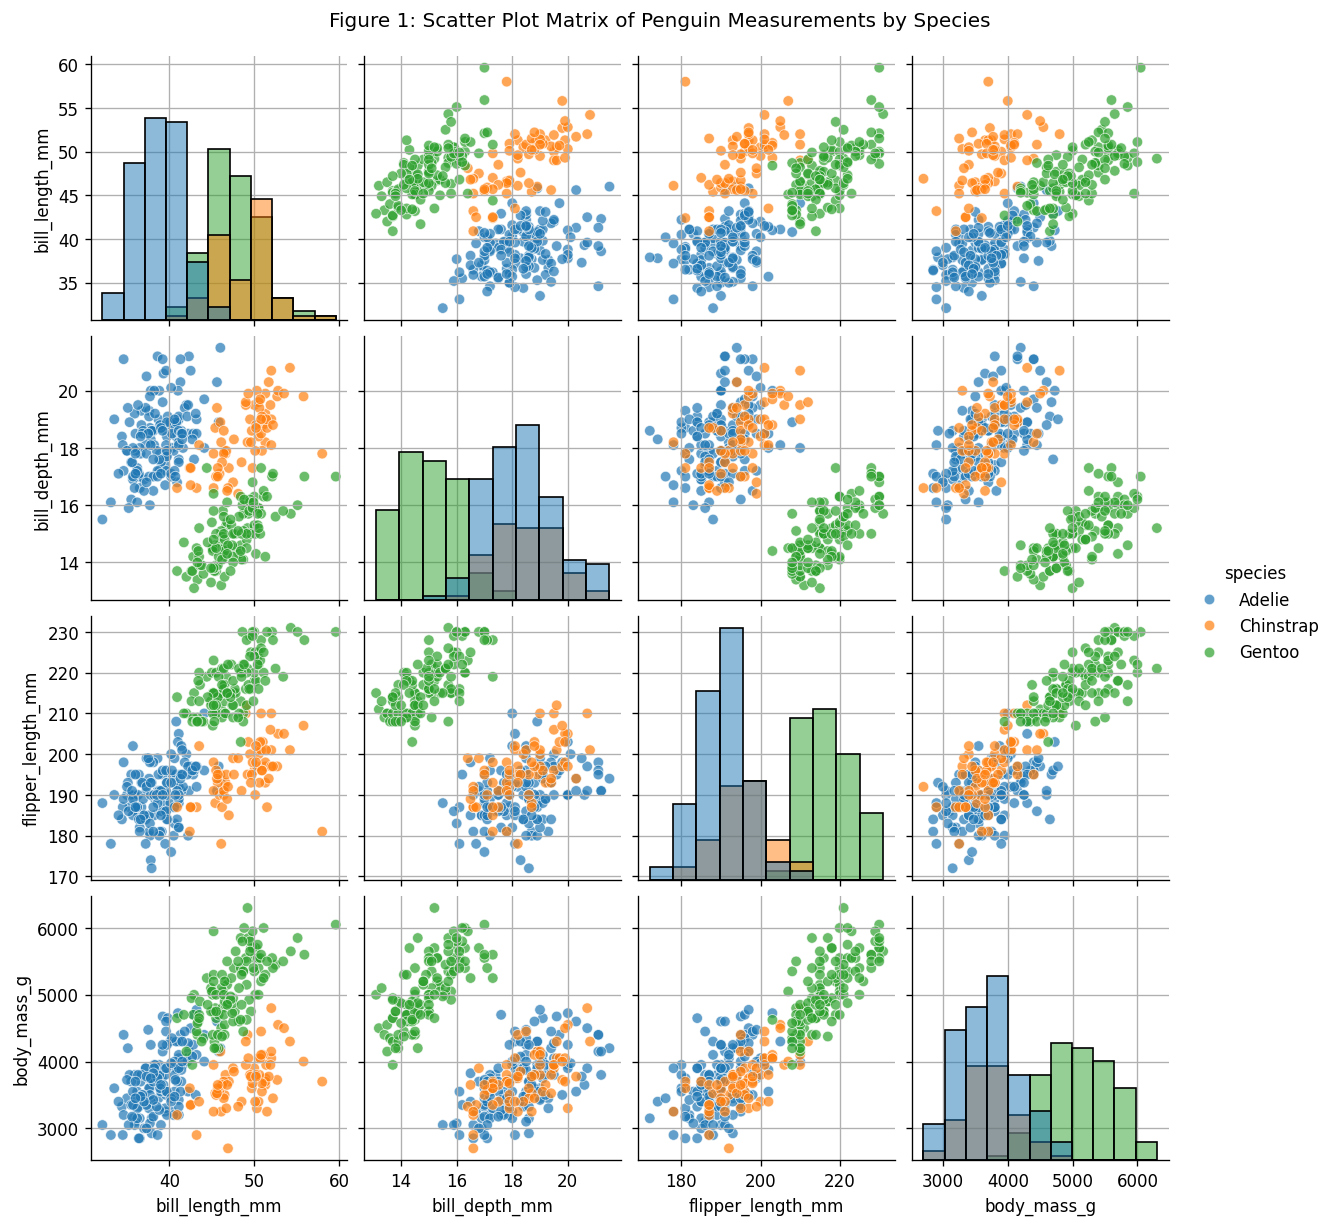

In [6]:
# Select numeric variables for the pairplot
num_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Create a scatter plot matrix (pairplot) coloured by species
sns.pairplot(
    penguins_clean[num_vars + ["species"]],
    hue="species",
    corner=False,           # show full matrix
    diag_kind="hist",       # histogram on diagonal
    plot_kws={"alpha": 0.7, "s": 40}  # transparency + point size
)

plt.suptitle("Figure 1: Scatter Plot Matrix of Penguin Measurements by Species", y=1.02)
plt.show()

## Figure 2 – 4D Scatter Plot of Bill Length, Flipper Length, Body Mass and Species

To examine specific relationships in more detail, I create a **4-dimensional scatter plot** using:

- **X-axis:** `bill_length_mm`
- **Y-axis:** `flipper_length_mm`
- **Colour (hue):** `species`
- **Point size:** `body_mass_g`

In **Figure 2**, each point represents a single penguin.  
The position shows its bill and flipper measurements, the colour indicates the species, and the point size reflects body mass.  
This allows me to visually compare how body mass and flipper length change with bill length for different species.

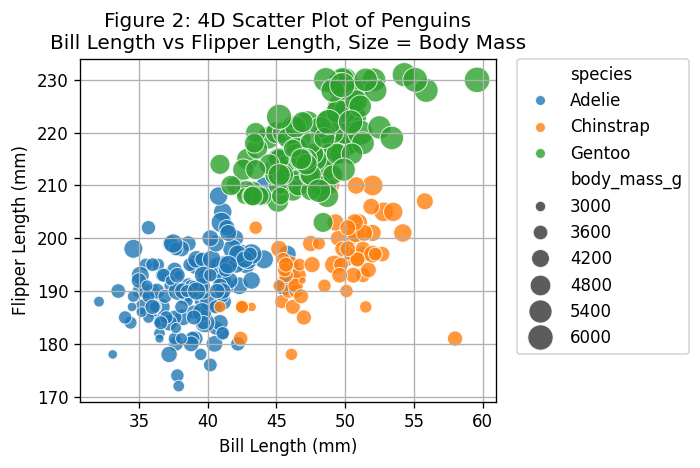

In [7]:
# 4D scatter: bill length vs flipper length, coloured by species, sized by body mass
plt.figure()

sns.scatterplot(
    data=penguins_clean,
    x="bill_length_mm",
    y="flipper_length_mm",
    hue="species",
    size="body_mass_g",
    sizes=(20, 250),   # min and max point sizes
    alpha=0.8
)

plt.title("Figure 2: 4D Scatter Plot of Penguins\nBill Length vs Flipper Length, Size = Body Mass")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()

## Figure 3 – Faceted Scatter Plot of Bill Dimensions by Species and Sex

To explore how bill dimensions vary **within** and **between** species, I create a faceted (trellis) scatter plot.

In **Figure 3**:

- **X-axis:** `bill_length_mm`  
- **Y-axis:** `bill_depth_mm`  
- **Columns (facets):** `species` – one panel per species  
- **Colour (hue):** `sex` – male vs female  

This plot makes it easier to compare the relationship between bill length and bill depth **for each species separately**,  
while also showing any differences between males and females within the same species.

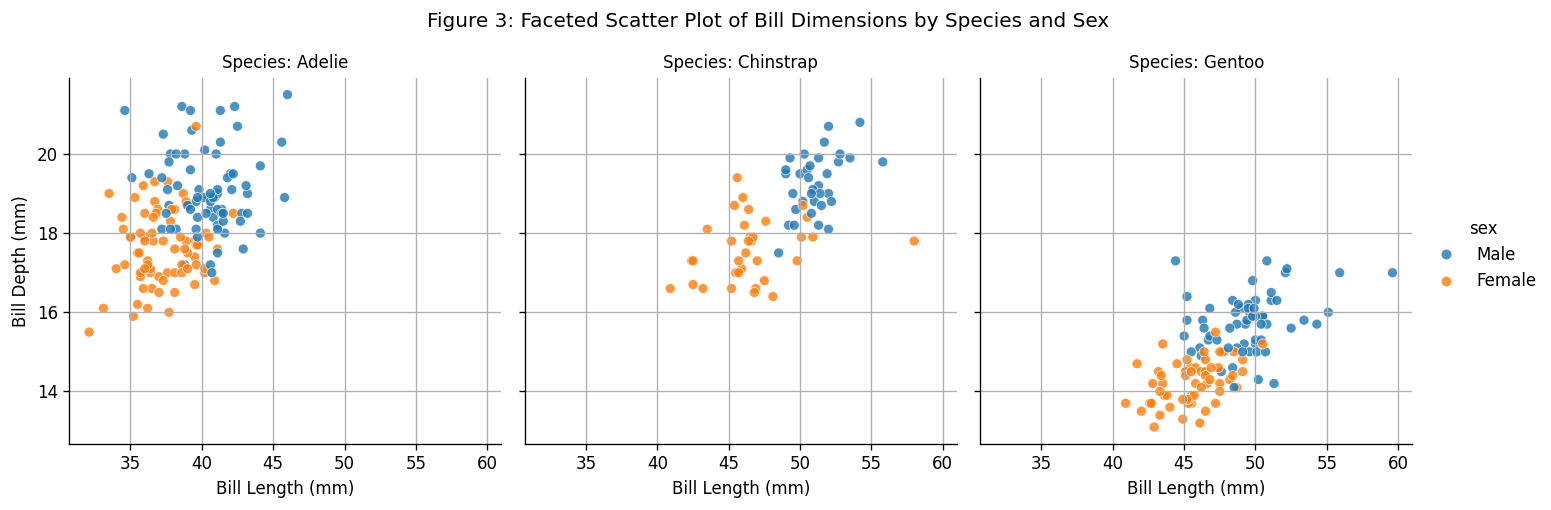

In [8]:
# Faceted scatter plot: bill length vs bill depth, faceted by species, coloured by sex
g = sns.relplot(
    data=penguins_clean,
    x="bill_length_mm",
    y="bill_depth_mm",
    col="species",
    hue="sex",
    kind="scatter",
    col_wrap=3,
    height=4,
    aspect=1,
    alpha=0.8
)

g.set_titles("Species: {col_name}")
g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
g.fig.suptitle("Figure 3: Faceted Scatter Plot of Bill Dimensions by Species and Sex", y=1.05)
plt.show()

## Figure 4 – Parallel Coordinates Plot of Penguin Measurements by Species

To compare multiple numeric variables **simultaneously**, I use a  
**parallel coordinates plot**.

In **Figure 4**, each line represents one penguin, and the axes show:

- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

Lines are coloured by **species**, so we can see how the overall measurement profiles  
differ between Adelie, Chinstrap, and Gentoo penguins.

Because plotting all 333 penguins can be visually dense, I sample a subset to keep the plot readable.

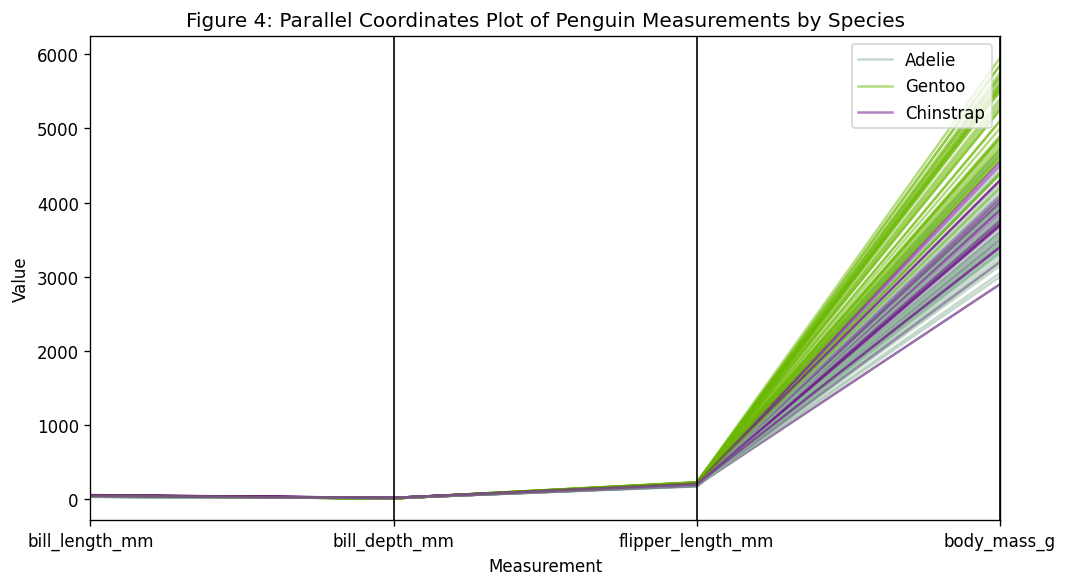

In [9]:
from pandas.plotting import parallel_coordinates

# Select a subset of rows to avoid overplotting (optional but helpful)
parallel_sample = penguins_clean.sample(n=120, random_state=42)

# Keep only the numeric variables + species
pc_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "species"]
parallel_data = parallel_sample[pc_cols].copy()

plt.figure(figsize=(9, 5))
parallel_coordinates(
    parallel_data,
    class_column="species",
    cols=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
    alpha=0.5
)

plt.title("Figure 4: Parallel Coordinates Plot of Penguin Measurements by Species")
plt.xlabel("Measurement")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Figure 5 – Correlation Heatmap of Numeric Variables

To quantify the strength and direction of relationships between the numeric variables,  
I compute a **correlation matrix** and visualise it as a **heatmap**.

In **Figure 5**, the cells show the Pearson correlation coefficients between:

- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

The colour scale indicates:

- Darker / red tones → stronger positive correlation  
- Darker / blue tones → stronger negative correlation  
- Values near 0 → weak or no linear relationship

This figure supports the patterns observed in Figures 1–4 by providing exact correlation values.

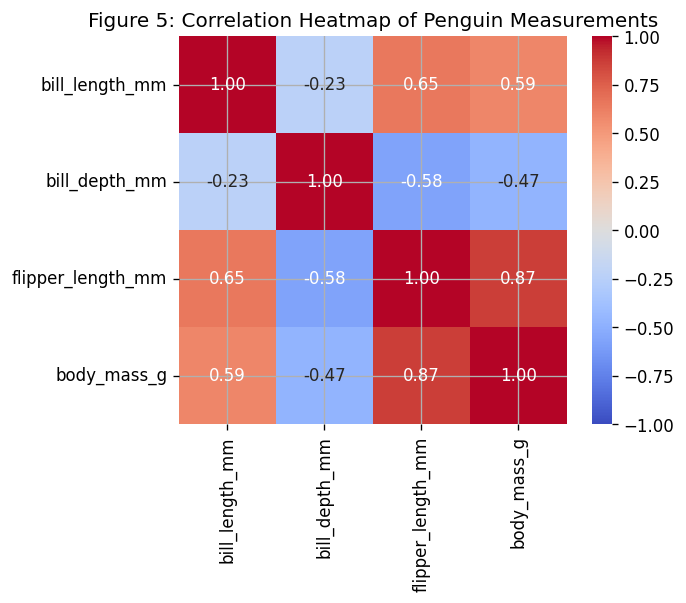

In [10]:
# Compute correlation matrix for numeric variables
corr_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
corr_matrix = penguins_clean[corr_vars].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True
)

plt.title("Figure 5: Correlation Heatmap of Penguin Measurements")
plt.tight_layout()
plt.show()

## Figure 6 – Radar Chart of Mean Measurements by Species

To summarise how the species differ **across several measurements at once**,  
I create a **radar (spider) chart** based on per-species averages.

In **Figure 6**, each axis represents one numeric variable:

- `bill_length_mm`
- `bill_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

For each species, I compute the **mean** of these variables and plot them as a
closed polygon on the radar chart. Because the variables are on very different
scales (millimetres vs grams), I first **normalise** the species means for each
variable into the range \[0, 1\]. This allows the shapes to be compared across
axes on a common scale.

This figure provides a compact view of the **multivariate profile** of each
species and complements the earlier scatter and parallel coordinates plots.

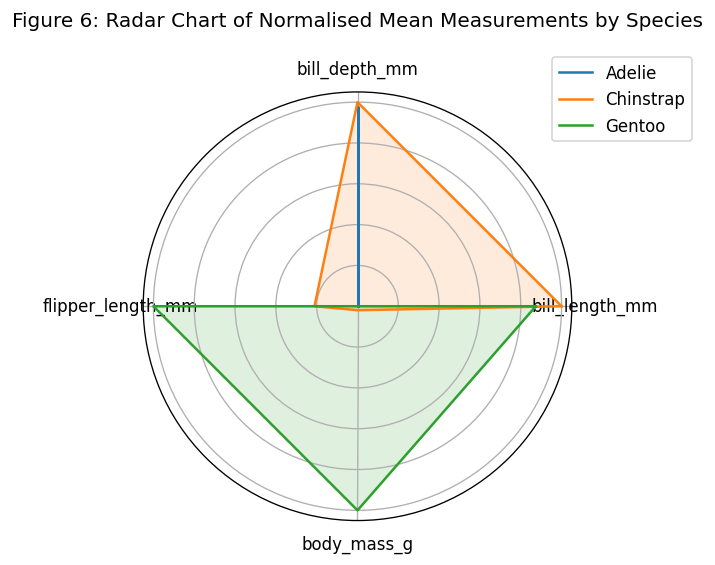

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Variables to include on the radar chart
radar_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Compute per-species means
species_means = penguins_clean.groupby("species")[radar_vars].mean()

# Min-max normalise the means for each variable to [0, 1]
norm_means = (species_means - species_means.min()) / (species_means.max() - species_means.min())

# Prepare angles for the radar chart (one per variable, plus wrap-around)
num_vars = len(radar_vars)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Start the plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Plot one polygon per species
for species in norm_means.index:
    values = norm_means.loc[species].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=species)
    ax.fill(angles, values, alpha=0.15)

# Axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_vars)
ax.set_yticklabels([])  # hide radial tick labels

plt.title("Figure 6: Radar Chart of Normalised Mean Measurements by Species", pad=20)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

## Figure 7 – Stacked Bar Chart of Penguin Species by Island

To include a categorical multivariate visualization similar to a **mosaic plot**,  
I create a **stacked bar chart** that shows how penguin species are distributed across the three islands.

In **Figure 7**:

- The x-axis represents **islands** (`Biscoe`, `Dream`, `Torgersen`).
- The stacked coloured segments show the **species composition** on each island.

This plot allows for easy comparison of the relative and absolute counts of each species per island.
It complements the numeric visualizations by focusing on **categorical relationships** in the data.

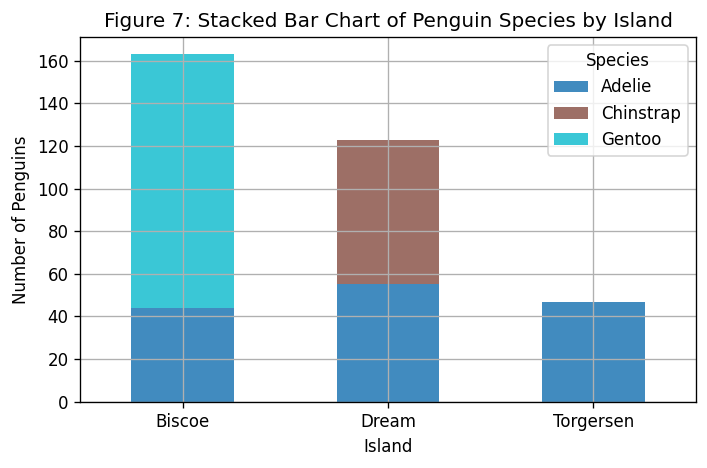

In [13]:
# Create a contingency table of species counts per island
species_island_counts = pd.crosstab(penguins_clean["island"], penguins_clean["species"])

# Plot a stacked bar chart
ax = species_island_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(6, 4),
    alpha=0.85,
    colormap="tab10"
)

plt.title("Figure 7: Stacked Bar Chart of Penguin Species by Island")
plt.xlabel("Island")
plt.ylabel("Number of Penguins")
plt.xticks(rotation=0)
plt.legend(title="Species")
plt.tight_layout()
plt.show()

## Discussion of Patterns and Relationships

In this section, I discuss the main patterns observed in the multivariate visualizations
(Figures 1–7).

### Overall patterns (Figure 1)

**Figure 1** shows a scatter plot matrix of the four numeric variables:
`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`,
with points coloured by species.

From this figure:

- There is a clear **positive relationship** between `flipper_length_mm`
  and `body_mass_g`: penguins with longer flippers tend to have higher body mass.
- `bill_length_mm` also appears **positively associated** with both
  `flipper_length_mm` and `body_mass_g`.
- `bill_depth_mm` behaves differently; Adelie penguins tend to have **deeper**
  bills but shorter bill length and flipper length compared to Gentoo penguins.
- The three species form **distinct clusters**, especially in
  (`flipper_length_mm`, `body_mass_g`) and (`bill_length_mm`, `bill_depth_mm`)
  panels, indicating that body size and bill shape vary systematically by species.

### 4D relationship between bill, flipper and body mass (Figure 2)

**Figure 2** presents a 4D scatter plot where:

- X-axis: `bill_length_mm`
- Y-axis: `flipper_length_mm`
- Colour: `species`
- Point size: `body_mass_g`

From this figure:

- Gentoo penguins (green) occupy the **upper-right region**, with both
  **longer flippers** and **greater body mass**.
- Adelie penguins (blue) cluster in the **lower-left region**, with shorter
  flippers and lower body mass.
- Chinstrap penguins (orange) fall in between, often with relatively longer bills.
- The varying point sizes reinforce that heavier penguins also tend to have
  longer flippers, particularly within Gentoo species.

### Bill shape differences by species and sex (Figure 3)

**Figure 3** shows faceted scatter plots of `bill_length_mm` versus
`bill_depth_mm`, with separate panels for each species and colours indicating sex.

Observations:

- For **Adelie** penguins, males tend to have **slightly longer and deeper bills**
  than females, although overlap is large.
- **Chinstrap** penguins show relatively long bills with moderate depth, and
  males again appear slightly larger on average.
- **Gentoo** penguins have **long bills with shallower depth** compared to Adelie,
  indicating a distinct bill shape profile.
- The faceted design aids comparison of **within-species sex differences**
  alongside the broader **between-species** contrasts.

### Multivariate profiles across measurements (Figure 4)

**Figure 4** employs a parallel coordinates plot to visualise all four numeric
variables for each species.

From this:

- Gentoo lines are higher on `flipper_length_mm` and `body_mass_g`,
  confirming they are the **largest** species.
- Adelie lines are lowest on those measures, consistent with a **smaller body size**.
- Chinstrap values fall in between, but with relatively higher `bill_length_mm`.
- The plot emphasises how each species has a **unique multivariate profile** across
  all variables, not just one or two.

### Quantifying correlations (Figure 5)

**Figure 5** shows the Pearson correlation heatmap of the four numeric variables.

Key observations:

- `flipper_length_mm` and `body_mass_g` show a **strong positive correlation**
  (~0.87), supporting patterns seen in Figures 1 and 2.
- `bill_length_mm` correlates moderately with both `flipper_length_mm`
  and `body_mass_g`, suggesting penguins with longer bills also tend to have
  larger bodies.
- `bill_depth_mm` is **negatively correlated** with both `flipper_length_mm`
  and `body_mass_g`, meaning deeper bills are linked to smaller body size.

Overall, the heatmap verifies that body-size–related variables cluster together,
while bill dimensions provide an **independent morphological dimension**.

### Multivariate species profiles (Figure 6)

**Figure 6** displays a **radar (spider) chart** of normalised mean measurements
for each species, providing a holistic view of their morphological profiles.

- Gentoo penguins dominate on `flipper_length_mm` and `body_mass_g`,
  forming the outermost polygon, indicating **larger overall size**.
- Chinstrap penguins peak on `bill_length_mm` and `bill_depth_mm`, suggesting
  proportionally **longer and deeper bills**.
- Adelie penguins have the lowest mean values on all variables, reflecting their
  **smaller, stockier build**.

This figure condenses multivariate mean trends into an intuitive comparative shape,
complementing the parallel coordinates plot by focusing on group-level averages.

### Categorical relationships across islands (Figure 7)

**Figure 7** presents a stacked bar chart showing the **distribution of species**
across the three islands.

- **Biscoe Island** hosts a large population of Gentoo and Adelie penguins.
- **Dream Island** contains mostly Chinstrap penguins, with fewer Adelies.
- **Torgersen Island** is inhabited exclusively by Adelie penguins in this dataset.

This visualisation parallels a **mosaic plot** in revealing how species
composition varies geographically, adding a categorical dimension to the
multivariate exploration.

---

### Summary

Across all seven figures, clear **multivariate relationships** emerge:

- Species differ not only in individual features but in **combinations** of
  traits—body size, bill dimensions, and habitat distribution.
- Body mass and flipper length form a cohesive **size axis**.
- Bill depth and length vary more independently, forming a **shape axis**.
- Geographic distribution (island) further influences these morphological
  groupings.

Together, these findings demonstrate how multivariate visualisation techniques
provide complementary insights into biological diversity and ecological patterns.


## Conclusion

In this assignment, I used the **Palmer Penguins** dataset to explore
relationships between multiple morphological variables using a range of
**multivariate visualization techniques**.

- A **scatter plot matrix (Figure 1)** provided an overview of pairwise
  relationships and showed clear clustering by species.
- A **4D scatter plot (Figure 2)** encoded bill length, flipper length,
  species and body mass in a single view, highlighting how Gentoo penguins
  are generally larger than Adelie and Chinstrap penguins.
- A **faceted scatter plot (Figure 3)** allowed comparison of bill shape
  across species and sex, revealing subtle within-species differences
  between males and females.
- A **parallel coordinates plot (Figure 4)** illustrated full multivariate
  profiles across four measurements for each species.
- A **correlation heatmap (Figure 5)** quantified the strength and direction
  of the relationships, confirming strong positive correlations between
  flipper length and body mass, and negative correlations between bill depth
  and body size.
- A **radar chart (Figure 6)** summarised mean profiles of each species
  across all measurements on a normalised scale, visually highlighting
  overall body size and bill shape differences.
- Finally, a **stacked bar chart (Figure 7)** revealed the categorical
  relationship between species and island, showing that different species
  dominate different geographic locations.

Together, these visualizations demonstrate how **multivariate data
visualization** techniques can be used to:

1. Identify clusters and group-level differences.  
2. Quantify and interpret correlations among variables.  
3. Reveal categorical and geographical patterns.  

Overall, this assignment highlights how combining **visual exploration** with
**statistical relationships** provides a deeper, more holistic understanding
of complex datasets — an essential step in modern exploratory data analysis.


## References

- Seaborn documentation – built-in `penguins` dataset.  
  https://seaborn.pydata.org/